# 👀 Multilayer perceptron (MLP)

In this notebook, we'll walk through the steps required to train your own multilayer perceptron on the CIFAR dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets
#from notebooks.utils import display

2024-07-19 11:58:32.884935: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-19 11:58:33.023834: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-07-19 11:58:33.023866: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-07-19 11:58:33.057690: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-19 11:58:33.807177: W tensorflow/stream_executor/pla

## 0. Parameters <a name="parameters"></a>

In [ ]:
#кол-во классов (выходных нейронов)
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>

In [ ]:
#стандартный датасет из keras, 50000 картинок 32х32 пикселя, 10 классов
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)


In [ ]:
#масшатабируем данные, чтобы все пикселы были от 0 до 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

#превращяем целочисленные метки классов в вектора, т.к модель оценивает вероятность каждого класса
y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)
print(y_train.shape)

(50000, 10)


In [ ]:
display(x_train[:10])
print(y_train[:10])

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## 2. Build the model <a name="build"></a>

Можно было бы использовать последовательную модель (Sequential), где слой идёт за слоем. Такая схема удобная, но не гибкая. Поэтому будем сразу использовать API keras для более гибкой настройки слоев.

Пример Sequential:

* model = models.Sequential([
*   layers.Flatten(input_shape=(32, 32, 3)),
*    layesr.Dense(200, activation = 'relu'),
*    layers.Dense(150, activation = 'relu'),
*    layers.Dense(10, activation = 'softmax')
* ])

In [ ]:
input_layer = layers.Input((32, 32, 3))

x = layers.Flatten()(input_layer) #Flatten превращает многомерный массив в плоский вектор
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)

output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________
2024-07-19 09:22:15.411936: W tensorflow/stream_executo

## 3. Train the model <a name="train"></a>

In [ ]:
#определяем оптимизатор и компилируем модель
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [ ]:
#batch_size - кол-во наблюдений которе передается на каждом шаге обучения
#epochs - сколько раз сеть прогонит через себя все данные
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
2024-07-19 09:26:34.492323: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8496 - accuracy: 0.3353
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6679 - accuracy: 0.4053
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5866 - accuracy: 0.4340
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5309 - accuracy: 0.4546
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4908 - accuracy: 0.4689
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4577 - accuracy: 0.4809
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4280 - accuracy: 0.4907
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4101 - accuracy: 0.4973
Epoch 9/10
1563/1563 [=====================

## 4. Evaluation <a name="evaluate"></a>

In [ ]:
#оценка модели на тестовых данных
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4511 - accuracy: 0.4858


[1.4511433839797974, 0.48579999804496765]

In [ ]:
#наши классы
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

# массив с предиктами для классов
preds = model.predict(x_test)
#тут берем максимальную вероятность из всех классов 
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 2ms/step


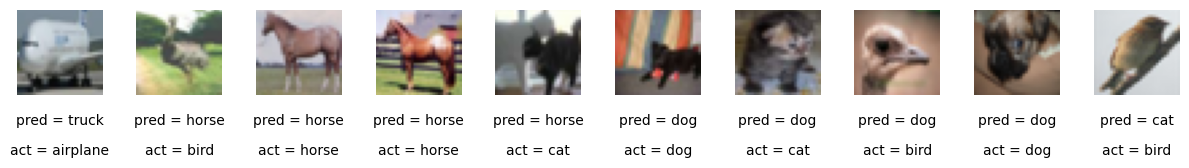

In [ ]:
#визуализируем данные с их предсказаниями
n_to_show = 10
#берем 10 случайный картинок
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)

# 5. CNN

добавим в модель слои свертки, нормализации и dropout-регуляризации

In [ ]:
input_layer = layers.Input((32, 32, 3))

#свертка, 32 фильтра, ядро 3x3, шаг 1
#нормализация
#активация
x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(
    input_layer
)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

#свертка, 32 фильтра, ядро 3x3, шаг 2 (выходная картинка в два раза меньше)
#нормализация
#активация
x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

#свертка, 64 фильтра, ядро 3x3, шаг 1
#нормализация
#активация
x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

#свертка, 64 фильтра, ядро 3x3, шаг 2
#нормализация
#активация
x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

#вытигаем в плоский вектор
x = layers.Flatten()(x)

#полносвязный слой с 128 нейронами
#нормализация
#активация
#регуляризация, удаляем половину нейронов
x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)

x = layers.Dense(NUM_CLASSES)(x)
output_layer = layers.Activation("softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
2024-07-19 11:59:03.435608: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-07-19 11:59:03.435643: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-07-19 11:59:03.435663: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-91321aab-aa91-4889-8ef1-9edef354e364): /proc/driver/nvidia/version does not exist
2024-07-19 11:59:03.435870: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Networ

In [ ]:
#компилируем
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

#обучаем
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, y_test),
)

1563/1563 [==============================] - 245s 157ms/step - loss: 0.6534 - accuracy: 0.7709 - val_loss: 0.7833 - val_accuracy: 0.7321


In [ ]:
model.evaluate(x_test, y_test, batch_size=1000)

2024-07-19 12:45:35.415248: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.
2024-07-19 12:45:35.569681: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 131072000 exceeds 10% of free system memory.
2024-07-19 12:45:35.964866: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 131072000 exceeds 10% of free system memory.
10/10 [==============================] - 13s 1s/step - loss: 0.7833 - accuracy: 0.7321


[0.783277690410614, 0.7321000099182129]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=91321aab-aa91-4889-8ef1-9edef354e364' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>